In [117]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [118]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
#     ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [119]:
img_dir = os.path.join(os.getcwd(), "./images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [120]:
X = pd.DataFrame([im.histogram() for im in images])

In [122]:
import numpy as np
from sklearn.decomposition import PCA

In [123]:
pca = PCA(n_components=2)

In [124]:
new_matrix = pca.fit_transform(X)

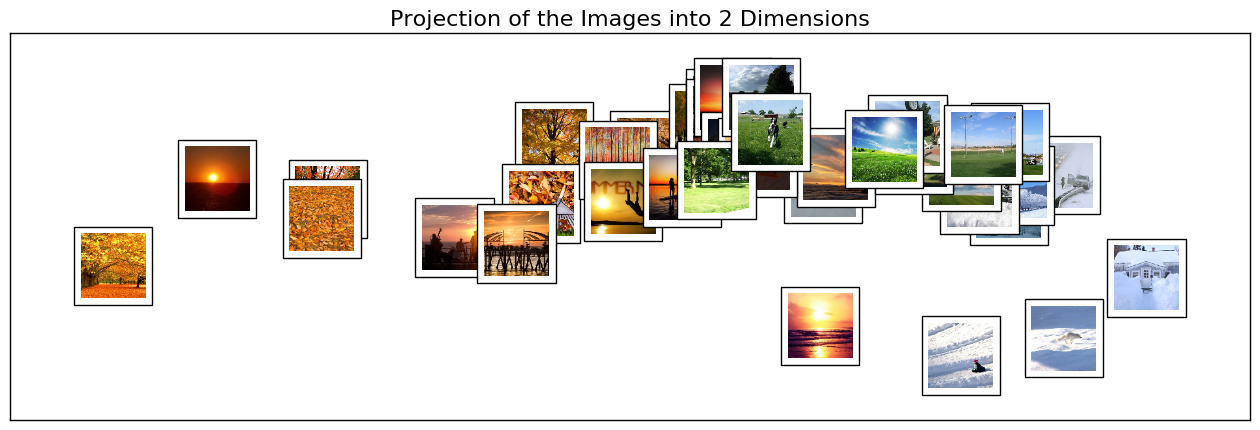

In [125]:
plot_image_space(images,new_matrix)

In [126]:
# Part 2:
# (1) What does it mean for two images to be close together in this plot? 
#     What does it mean for two images to be far apart?
# two images to be close together means that the two images are similar and has a great chance 
# that the two pictures are from the same season or from the adjacent seasons
# two images to be far apart means the two images has a great chance that they are not from the same season
# (2) Do images corresponding to one of the seasons tend to group together more closely than others? 
#     Why might this be the case?
#     winter. because winter has snow and snow is white that is much different from other seasons. 
#     And white is near RGB(255,255,255) makes feature in histogram of high value has more samples, 
#     which makes the winter images group together 

In [127]:
# Part 3 :(use another method: LLE)
#print("Computing LLE..."),
from sklearn import manifold
clf = manifold.LocallyLinearEmbedding(n_neighbors=25, n_components=2, method='standard')
X_lle = clf.fit_transform(X)

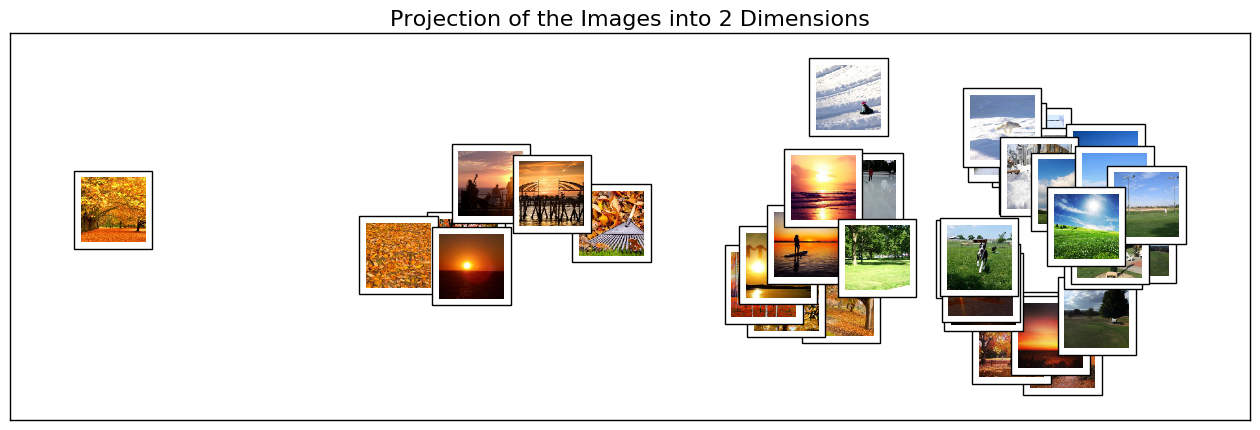

In [128]:
plot_image_space(images,X_lle)

In [129]:
# 
# (1) What does it mean for two images to be close together in this plot? 
#     What does it mean for two images to be far apart?
# two images to be close together means that the two images are similar and has a great chance 
# that the two pictures are from the same season or from the adjacent seasons
# two images to be far apart means the two images has a great chance that they are not from the same season
# (2) Do images corresponding to one of the seasons tend to group together more closely than others? 
#     Why might this be the case?
#     fall. because the fall picture's histogram are very similar, when we find 25 nearest neighbors of a picture, 
#     fall picture's neighbor will always be fall picture or summer picture. That may makes the fall group more closely


In [ ]:
# difference between PCA and LLE:
# Difference: LLE seems to classify the fall image better than PCA. from the second image we can see that the fall image 
# has been grouped together, however in PCA, the fall image are not classified very clearly.
# PCA are better at classify the winter image. In PCA winter image are grouped at the top right of the picture.
# However in LLE, winter image are grouped with spring image.

# Similarity: Both PCA and LLE are not very good at classifying spring and summer. 
# Both of the two methods could not group spring and summer very well. Spring and Summer always mix together.
# 